## Analisys of our PCA realization 

### Import libs

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.decomposition import PCA, KernelPCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Download dataset

In [2]:
data = pd.read_csv('./datasets/moonDataset.csv')
data.head()

X1        X2        X3  label
0 -0.926767 -0.111073  0.086017      0
1 -0.917583  0.706006  0.058041      0
2  0.437984  0.899093  0.072543      0
3  0.089694  0.291446  0.070444      1
4  0.110672 -0.070806 -0.090376      1

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      200 non-null    float64
 1   X2      200 non-null    float64
 2   X3      200 non-null    float64
 3   label   200 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 6.4 KB


In [3]:
data['Sex'] = data['Sex'].astype('category')
data['BP'] = data['BP'].astype('category')
data['Cholesterol'] = data['Cholesterol'].astype('category')
data['Drug'] = data['Drug'].astype('category')

data['Sex'] = data['Sex'].cat.codes
data['BP'] = data['BP'].cat.codes
data['Cholesterol'] = data['Cholesterol'].cat.codes
data['Drug'] = data['Drug'].cat.codes

data.head()

Age  Sex  BP  Cholesterol  Na_to_K  Drug
0   23    0   0            0   25.355     0
1   47    1   1            0   13.093     3
2   47    1   1            0   10.114     3
3   28    0   2            0    7.798     4
4   61    0   1            0   18.043     0

In [12]:
data.describe().T

count      mean       std       min       25%       50%       75%  \
X1     200.0  0.499625  0.864680 -1.082877 -0.066660  0.517917  1.044591   
X2     200.0  0.242255  0.505837 -0.671388 -0.182419  0.215962  0.696222   
X3     200.0 -0.007900  0.060073 -0.099842 -0.059922 -0.010587  0.040636   
label  200.0  0.500000  0.501255  0.000000  0.000000  0.500000  1.000000   

            max  
X1     2.148725  
X2     1.168358  
X3     0.099933  
label  1.000000

[]

<Figure size 1500x1000 with 0 Axes>

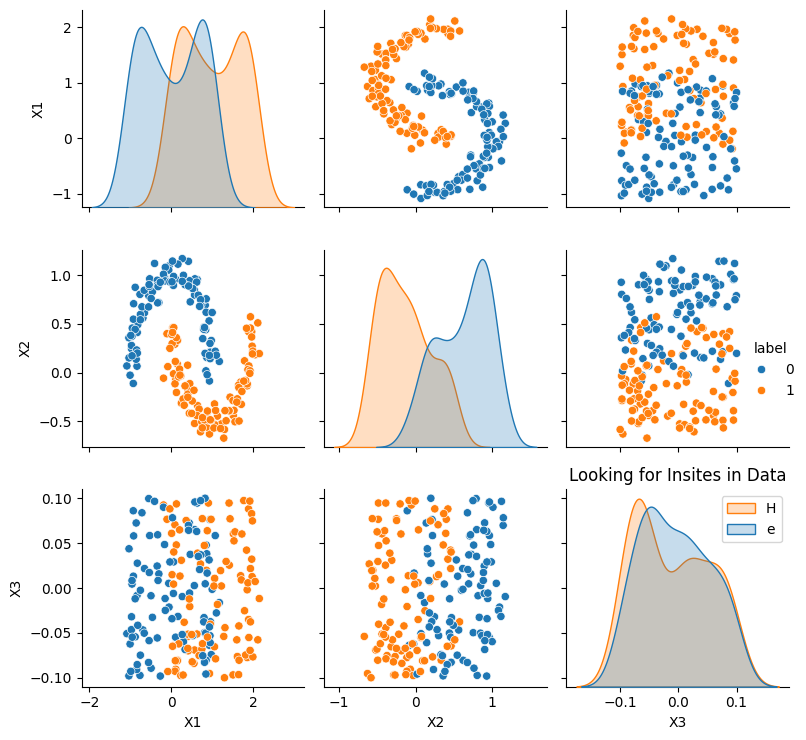

In [18]:
plt.figure(figsize=(15,10))
sns.pairplot(data, hue="label")
plt.title("Looking for Insites in Data")
plt.legend("HeartDisease")
plt.tight_layout()
plt.plot()

In [8]:
fig = px.scatter_3d(df, x=0, y=1, z=2,
              color='label')
fig.show()

### Data preprocessing

In [7]:
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [4]:
from linear.matrix import Matrix
from models.pca import SVD_PCA

X = data.drop(['label'], axis=1)
y = data['label']

X = StandardScaler().fit_transform(X)

In [5]:
from models.pca import SVD_PCA
from linear.matrix import Matrix

X = Matrix(X)
pca = SVD_PCA()
P, explained_variances, X_transformed = pca.fit(X)

In [69]:
X_t_1 = X @ P.value[:, :11]
X_t_2 = X @ P.value[:, :6]

In [84]:
ratio = explained_variances / explained_variances.sum()
ratio

array([0.47638968, 0.34309999, 0.18051033])

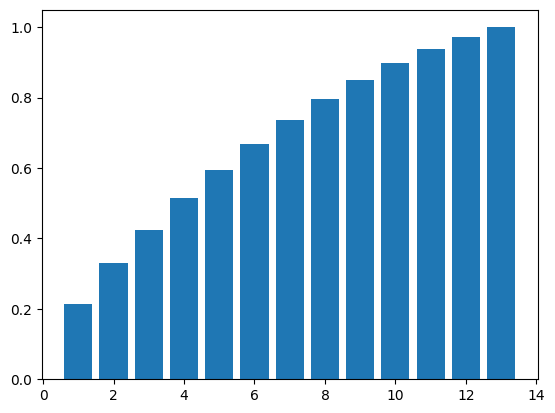

In [14]:
ratio_sum = np.cumulative_sum(ratio)
nums = np.array([x for x in range(1, P.shape[1]+1)])

fig, ax = plt.subplots()

ax.bar(nums, ratio_sum, linewidth=2.5)

plt.show()

<BarContainer object of 13 artists>

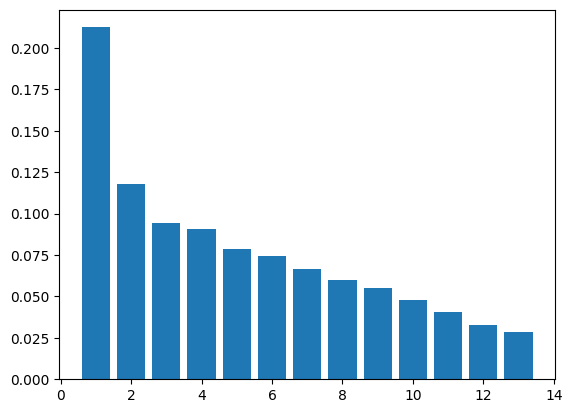

In [15]:
fig, ax = plt.subplots()

ax.bar(nums, ratio, linewidth=2.5)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed.value, y, test_size=0.33, random_state=42)
X_train_2, X_test_2, y_train, y_test = train_test_split(X_t_1, y, test_size=0.33, random_state=42)
X_train_3, X_test_3, y_train, y_test = train_test_split(X_t_2, y, test_size=0.33, random_state=42)
X_train_sl, X_test_sl, y_train_sl, y_test_sl = train_test_split(x_new, y, test_size=0.33, random_state=42)
X_train_sl_2, X_test_sl_2, y_train_sl, y_test_sl = train_test_split(x_new_2, y, test_size=0.33, random_state=42)
X_train_sl_3, X_test_sl_3, y_train_sl, y_test_sl = train_test_split(x_new_3, y, test_size=0.33, random_state=42)
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X, y, test_size=0.33, random_state=42)

In [76]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
print('----------------------------------------------------------')
print(f'Explained var our PCA: {explained_variances}')
print()
print(f'Explained var sklearn PCA: {k.explained_variance_}')
print('----------------------------------------------------------')
lr.fit(X_train_b, y_train_b)
print(f'Linear Regression score without PCA (Train): {lr.score(X_train_b, y_train_b)}')
print(f'Linear Regression score without PCA (Test): {lr.score(X_test_b, y_test_b)}')
print('----------------------------------------------------------')
print('PCA with full components')
lr.fit(X_train, y_train)
print(f'    Linear Regression score with our PCA (Train): {lr.score(X_train, y_train)}')
print(f'    Linear Regression score with our PCA (Test): {lr.score(X_test, y_test)}')
lr.fit(X_train_sl, y_train_sl)
print(f'    Linear Regression score with sklearn PCA (Train): {lr.score(X_train_sl, y_train_sl)}')
print(f'    Linear Regression score with sklearn PCA (Test): {lr.score(X_test_sl, y_test_sl)}')
print('----------------------------------------------------------')
lr.fit(X_train_2, y_train)
print('PCA with 10 components')
print(f'    Linear Regression score with our PCA 11 component (Train): {lr.score(X_train_2, y_train)}')
print(f'    Linear Regression score with our PCA (Test): {lr.score(X_test_2, y_test)}')
lr.fit(X_train_sl_2, y_train_sl)
print(f'    Linear Regression score with sklearn PCA (Train): {lr.score(X_train_sl_2, y_train_sl)}')
print(f'    Linear Regression score with sklearn PCA (Test): {lr.score(X_test_sl_2, y_test_sl)}')
print('----------------------------------------------------------')
print('PCA with 5 components')
lr.fit(X_train_3, y_train)
print(f'    Linear Regression score with our PCA 11 component (Train): {lr.score(X_train_3, y_train)}')
print(f'    Linear Regression score with our PCA (Test): {lr.score(X_test_3, y_test)}')
lr.fit(X_train_sl_3, y_train_sl)
print(f'    Linear Regression score with sklearn PCA (Train): {lr.score(X_train_sl_3, y_train_sl)}')
print(f'    Linear Regression score with sklearn PCA (Test): {lr.score(X_test_sl_3, y_test_sl)}')
print('----------------------------------------------------------')


----------------------------------------------------------
Explained var our PCA: [2.772176   1.54178039 1.22688342 1.18505659 1.02535054 0.97322784
 0.86562678 0.77851473 0.72130605 0.62362837 0.53186008 0.42454351
 0.37309206]

Explained var sklearn PCA: [2.772176   1.54178039 1.22688342 1.18505659 1.02535054 0.97322784
 0.86562678 0.77851473 0.72130605 0.62362837 0.53186008 0.42454351
 0.37309206]
----------------------------------------------------------
Linear Regression score without PCA (Train): 0.8817733990147784
Linear Regression score without PCA (Test): 0.81
----------------------------------------------------------
PCA with full components
    Linear Regression score with our PCA (Train): 0.8817733990147784
    Linear Regression score with our PCA (Test): 0.81
    Linear Regression score with sklearn PCA (Train): 0.8817733990147784
    Linear Regression score with sklearn PCA (Test): 0.81
----------------------------------------------------------
PCA with 10 components
    

In [92]:

X_t = X.value @ P.value[:, :i]

print('----------------------------------------------------------')
print('Linear kernel:')
X_train, X_test, y_train, y_test = train_test_split(X_t, y, test_size=0.33, random_state=42)
lr.fit(X_train, y_train)
print(f'    train score={lr.score(X_train, y_train)}, test score={lr.score(X_test, y_test)}')
print('----------------------------------------------------------')
print('RBF kernel:')
X_train, X_test, y_train, y_test = train_test_split(x_slkp, y, test_size=0.33, random_state=42)
lr.fit(X_train, y_train)
print(f'    train score={lr.score(X_train_1, y_train)}, test score={lr.score(X_test_1, y_test)}')
print('----------------------------------------------------------')

3 components: train score=0.8432835820895522, test score=0.9090909090909091
2 components: train score=0.8059701492537313, test score=0.9090909090909091
1 components: train score=0.8208955223880597, test score=0.8939393939393939


[]

<Figure size 1500x1000 with 0 Axes>

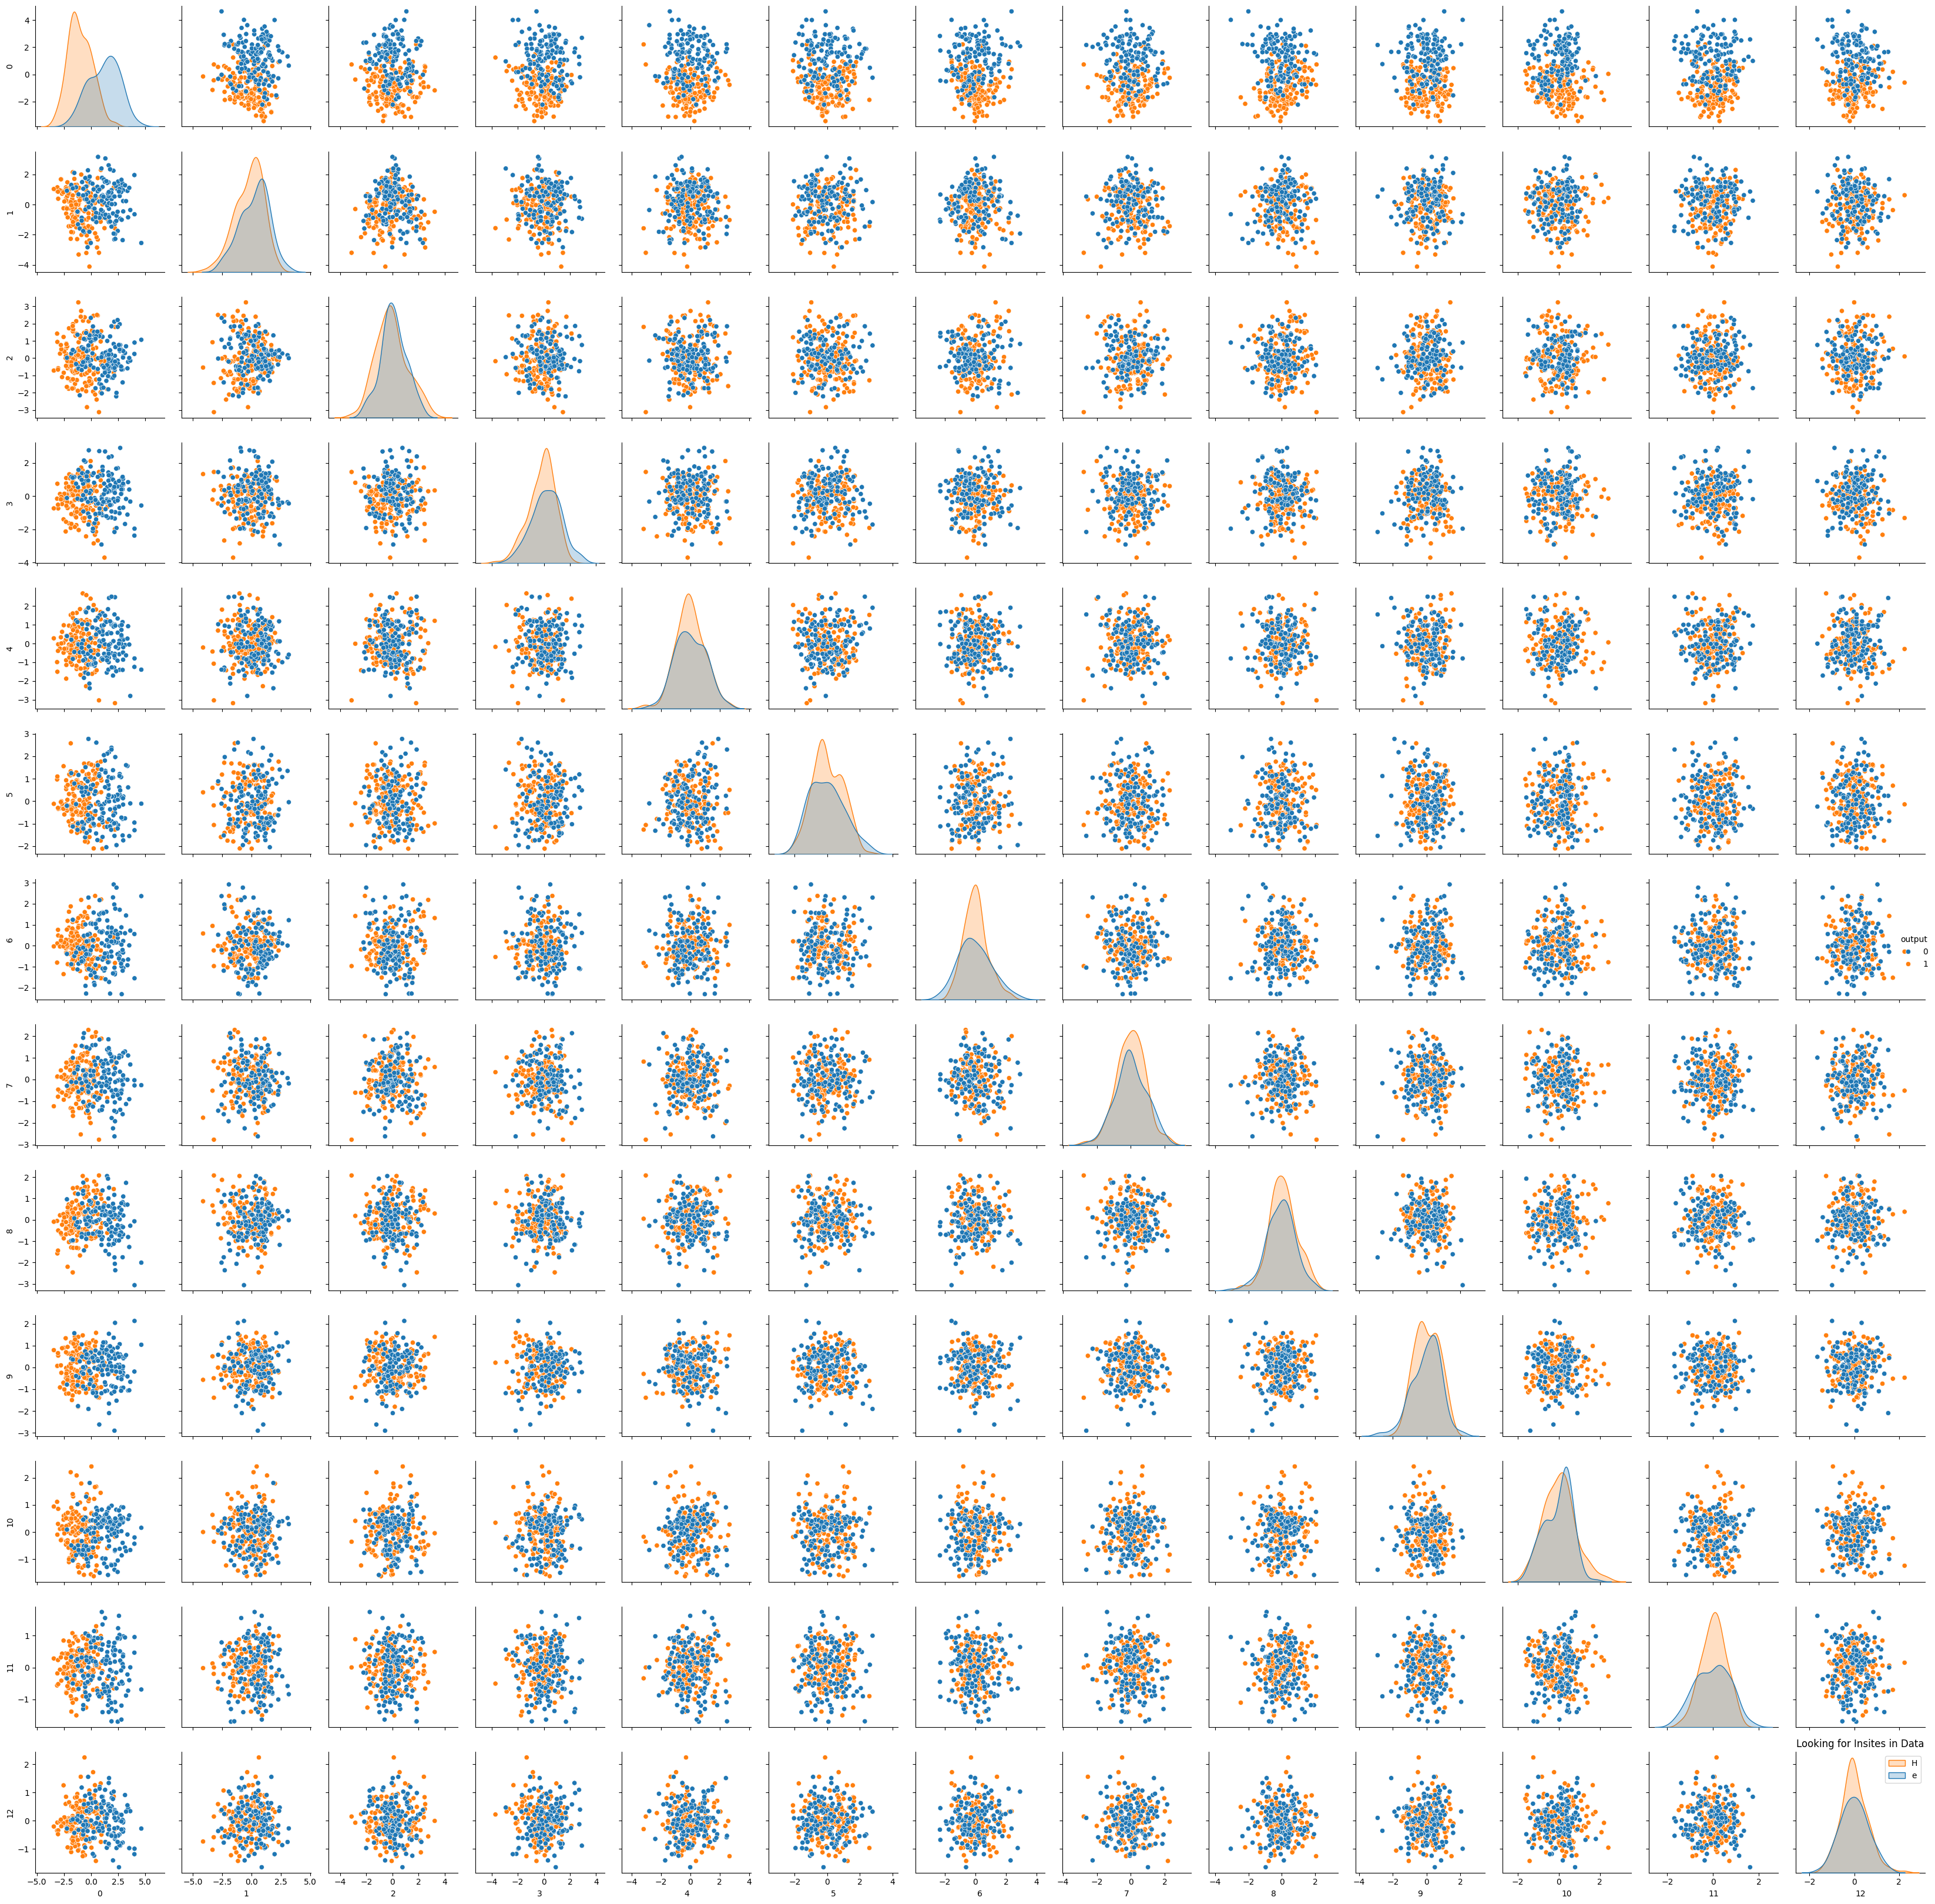

In [16]:
df = pd.DataFrame(X_transformed.value)
df['output'] = y

plt.figure(figsize=(15,10))
sns.pairplot(df, hue='output')
plt.title("Looking for Insites in Data")
plt.legend("HeartDisease")
plt.tight_layout()
plt.plot()

In [6]:
from models.pca import SVD_PCA
from linear.matrix import Matrix

pca_kernel = SVD_PCA(kernel='rbf')
_, _, x_new = pca_kernel.fit(X)

In [12]:
from sklearn.decomposition import KernelPCA

kp = KernelPCA(kernel='rbf')
x_slkp_rbf = kp.fit_transform(X.value)
kp = KernelPCA(kernel='poly')
x_slkp_p = kp.fit_transform(X.value)

In [98]:
X_train, X_test, y_train, y_test = train_test_split(x_new.value, y, test_size=0.33, random_state=42)
X_train_1, X_test_1, y_train, y_test = train_test_split(x_slkp, y, test_size=0.33, random_state=42)

lr.fit(X_train, y_train)
lr.fit(X_train_1, y_train)
print(f'train score={lr.score(X_train_1, y_train)}, test score={lr.score(X_test_1, y_test)}')

train score=0.8880597014925373, test score=0.9242424242424242


In [ ]:
df = pd.DataFrame(x_new)
df['label'] = y

plt.figure(figsize=(15,10))
sns.pairplot(df, hue='label')
plt.title("Looking for Insites in Data")
plt.legend("HeartDisease")
plt.tight_layout()
plt.plot()

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x105032fc0>>
Traceback (most recent call last):
  File "/Users/dkravchenko/MMoML/.venv/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


In [71]:
from sklearn.decomposition import PCA
k = PCA(n_components=13)
x_new = k.fit_transform(X)
k_2 = PCA(n_components=10)
x_new_2 = k_2.fit_transform(X)
k_3 = PCA(n_components=5)
x_new_3 = k_3.fit_transform(X)

In [9]:
from linear.matrix import Matrix
from models.pca import SVD_PCA

pca_kernel = SVD_PCA(kernel='laplacian')
_, _, x_lap = pca_kernel.fit(X)

In [ ]:
df = pd.DataFrame(x_new.value)
df['label'] = y

plt.figure(figsize=(15,10))
sns.pairplot(df, hue='label')
plt.title("Looking for Insites in Data")
plt.legend("HeartDisease")
plt.tight_layout()
plt.plot()

In [10]:
pca_kernel = SVD_PCA(kernel='sigmoid')
_, _, x_sig = pca_kernel.fit(X)

In [11]:
pca_kernel = SVD_PCA(kernel='poly')
_, _, x_poly = pca_kernel.fit(X)

In [17]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

print('----------------------------------------------------------')
print('Linear kernel:')
X_train, X_test, y_train, y_test = train_test_split(X_transformed.value, y, test_size=0.33, random_state=42)
lr.fit(X_train, y_train)
print(f'    train score={lr.score(X_train, y_train)}, test score={lr.score(X_test, y_test)}')
print('----------------------------------------------------------')
print('RBF kernel:')
X_train, X_test, y_train, y_test = train_test_split(x_new, y, test_size=0.33, random_state=42)
lr.fit(X_train, y_train)
print('     Our:')
print(f'    train score={lr.score(X_train, y_train)}, test score={lr.score(X_test, y_test)}')
X_train, X_test, y_train, y_test = train_test_split(x_slkp_rbf, y, test_size=0.33, random_state=42)
lr.fit(X_train, y_train)
print('     Skilearn:')
print(f'    train score={lr.score(X_train, y_train)}, test score={lr.score(X_test, y_test)}')
print('----------------------------------------------------------')
print('Laplacian kernel:')
X_train, X_test, y_train, y_test = train_test_split(x_lap.value, y, test_size=0.33, random_state=42)
lr.fit(X_train, y_train)
print(f'    train score={lr.score(X_train, y_train)}, test score={lr.score(X_test, y_test)}')
print('----------------------------------------------------------')
print('Sigmoid kernel:')
X_train, X_test, y_train, y_test = train_test_split(x_sig.value, y, test_size=0.33, random_state=42)
lr.fit(X_train, y_train)
print(f'    train score={lr.score(X_train, y_train)}, test score={lr.score(X_test, y_test)}')
print('----------------------------------------------------------')
print('Poly kernel:')
X_train, X_test, y_train, y_test = train_test_split(x_poly.value, y, test_size=0.33, random_state=42)
lr.fit(X_train, y_train)
print('     Our:')
print(f'    train score={lr.score(X_train, y_train)}, test score={lr.score(X_test, y_test)}')
X_train, X_test, y_train, y_test = train_test_split(x_slkp_p, y, test_size=0.33, random_state=42)
lr.fit(X_train, y_train)
print('     Skilearn:')
print(f'    train score={lr.score(X_train, y_train)}, test score={lr.score(X_test, y_test)}')
print('----------------------------------------------------------')

----------------------------------------------------------
Linear kernel:
    train score=0.8432835820895522, test score=0.9090909090909091
----------------------------------------------------------
RBF kernel:
     Our:
    train score=0.8880597014925373, test score=0.9242424242424242
     Skilearn:
    train score=0.8880597014925373, test score=0.9242424242424242
----------------------------------------------------------
Laplacian kernel:
    train score=0.5149253731343284, test score=0.4696969696969697
----------------------------------------------------------
Sigmoid kernel:
    train score=0.9253731343283582, test score=0.9242424242424242
----------------------------------------------------------
Poly kernel:
     Our:
    train score=0.48507462686567165, test score=0.5303030303030303
     Skilearn:
    train score=0.9029850746268657, test score=0.9242424242424242
----------------------------------------------------------


/Users/dkravchenko/MMoML/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
